# SAS Viya, CAS & Python Integration Workshop

### Notebook Summary

1. [Set Up](#1)
2. [Exploring CAS Action Sets and the CASResults Object](#2)
3. [Working with a SASDataFrame](#3)
4. [Exploring the CAS File Structure](#4)
5. [Loading Data Into CAS](#5)
6. [Exploring Table Details](#6)
7. [Data Exploration](#7)
8. [Filtering Data](#8)
9. [Data Preparation](#9)
10. [SQL](#10)
11. [Analyzing Data](#11)
12. [Promote the Table to use in SAS Visual Analytics](#12)

# SAS Viya

### What is SAS Viya

SAS Viya extends the SAS Platform, operates in the cloud (as well as in hybrid and on-prem solutions) and is open source-friendly. For better performance while manipulating data and running analytical procedures, SAS Viya can run your code in Cloud Analytic Services (CAS). CAS operates on in-memory data, removing the read/write transfer overhead. Further, it enables everyone in an organization to collaborate and work with data by providing a variety of [products and solutions](https://www.sas.com/en_us/software/viya.html) running in CAS.

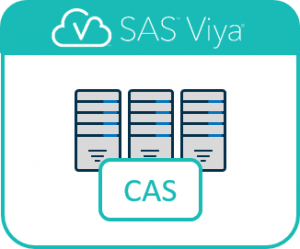

### Cloud Analytic Services (CAS)
SAS Viya processes data and performs analytics using *SAS Cloud Analytic Services*, or *CAS* for short. CAS provides a powerful distributed computing environment designed to store large data sets in memory for fast and efficient processing. It uses scalable, high-performance, multi-threaded algorithms to rapidly perform analytical processing on in-memory data of any size.

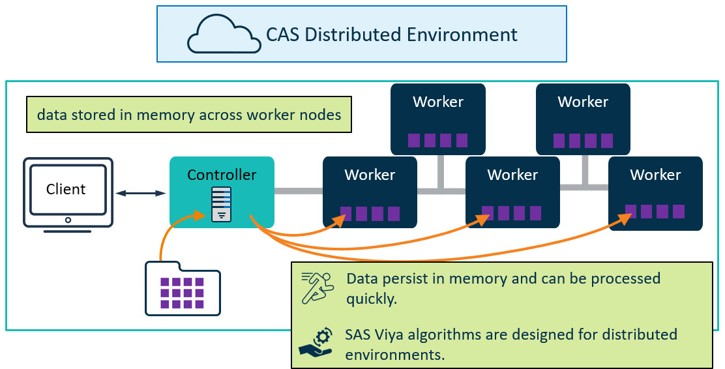

#### For more information about Cloud Analytic Services, visit the documentation: [SAS® Cloud Analytic Services 3.5: Fundamentals](https://go.documentation.sas.com/?docsetId=casfun&docsetTarget=titlepage.htm&docsetVersion=3.5&locale=en)

### SAS Viya is Open
SAS Viya is open. Business analysts and data scientists can explore, prepare and manage data to provide insights, create visualizations or analytical models using the SAS programming language or a variety of open source languages like Python, R, Lua, or Java. Because of this, programmers can easily process data in CAS, using a language of their choice.

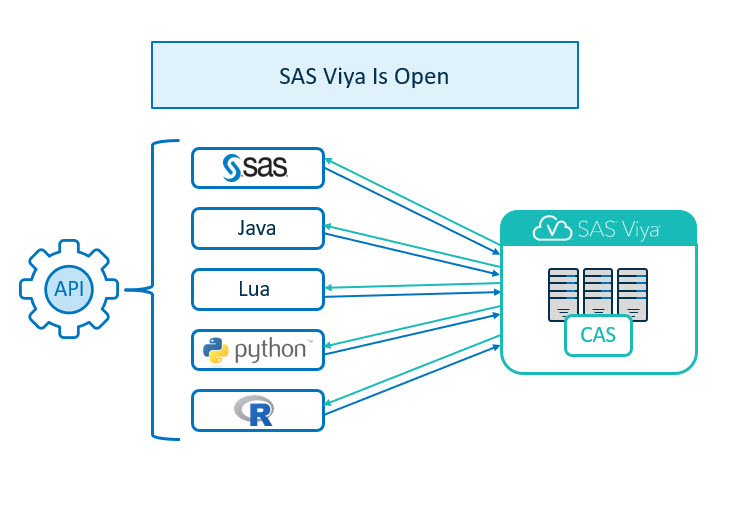

## <a id='1'>1. Set Up <a/>

### a. Import Packages

Visit the documentation for the SWAT [(SAS Scripting Wrapper for Analytics Transfer)](https://sassoftware.github.io/python-swat/index.html) package.

In [1]:
## Data Management
import swat
import pandas as pd

## Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## my personal module to connect to CAS
from casConnect import connect_to_cas 

## Global Options
swat.options.cas.trace_actions = False      # Enabling tracing of actions (Default is False. Will change to true later)
swat.options.cas.trace_ui_actions = False   # Display the actions behind “UI” methods (Default is False. Will change to true later)
pd.set_option('display.max_columns', 500)   # Modify DataFrame max columns shown
pd.set_option('display.max_colwidth', 1000) # Modify DataFrame max column width

### b. Make a Connection to CAS</a>

##### To connect to the CAS server you will need:
1. the host name, 
2. the portnumber, 
3. your user name, and your password.

Visit the documentation [Getting Started with SAS® Viya® 3.5 for Python](https://go.documentation.sas.com/api/docsets/caspg3/3.5/content/caspg3.pdf) for more information about connecting to CAS.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [2]:
## My personal connection to CAS. You will have your own.
## General form: swat.CAS(host, port, username, password)
conn = connect_to_cas() 

In [3]:
conn

CAS('ssemonthly.demo.sas.com', 443, protocol='https', name='py-session-1', session='142b7265-b6a2-fb47-bd02-2ea9f4bb8107')

### c. Obtain Data for the Demo

In [4]:
conn.fileinfo()

[FileInfo]

     Permission Owner Group                     Name      Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas            cars.sas7bdat    139264             2022-08-16T21:25:39+00:00  1.976304e+09
 1   -rwxr-xr-x   sas   sas              VTI.sashdat    413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 2   -rwxr-xr-x   sas   sas             hmeq.sashdat    630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 3   -rwxr-xr-x   sas   sas       tsa_claims_raw.csv  34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 4   -rwxr-xr-x   sas   sas  warranty_claims.parquet      4096       NONE  2022-11-17T13:43:26+00:00  1.984312e+09
 5   -rwxr-xr-x   sas   sas         HMEQ_SAS.parquet      4096       NONE  2022-11-17T13:46:56+00:00  1.984312e+09
 6   -rwxr-xr-x   sas   sas             cars.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 7   -rwxr-xr-x   sas   sas  WARRANTY_CLAIMS.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas        classCopy.sashdat     20904       NONE  2022-12-21T16:59:03+00:00  1.987261e+09
 9   -rwxr-xr-x   sas   sas             cars.sashdat    102936       NONE  2023-01-06T14:29:25+00:00  1.988635e+09
 10  -rwxr-xr-x   sas   sas                 cars.csv     34289             2023-01-06T14:29:25+00:00  1.988635e+09
 11  -rwxr-xr-x   sas   sas                 cars.txt     34289             2023-01-06T14:29:26+00:00  1.988635e+09
 12  -rwxr-xr-x   sas   sas           ordersDemo.csv    696446             2023-01-18T00:35:57+00:00  1.989621e+09

+ Elapsed: 0.0401s, user: 0.0126s, sys: 0.0177s, mem: 1.79mb

In [5]:
## Download the data from github and load to the CAS server
conn.read_csv(r"https://raw.githubusercontent.com/sassoftware/sas-viya-programming/master/data/cars.csv", 
              casout={"name":"cars", 
                      "caslib":"casuser", 
                      "replace":True})

## Save the in-memory table as a physical file
conn.save(table="cars", name="cars.sashdat",
          caslib="casuser",
          replace=True)

## Drop the in-memory table
conn.droptable(name='cars', caslib="casuser")

NOTE: Cloud Analytic Services made the uploaded file available as table CARS in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: The table CARS has been created in caslib CASUSER(Peter.Styliadis@sas.com) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services saved the file cars.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table cars from caslib CASUSER(Peter.Styliadis@sas.com).


+ Elapsed: 0.013s, user: 0.0124s, sys: 0.0152s, mem: 1.37mb

## <a id='2'>2. Exploring CAS Action Sets and the CASResults Object</a>
- Think of **action sets** as a *package*, and all the **actions** inside an action set as a *method*.
- CAS actions interact with the CAS server and return a **CASResults** object. 
- A **CASResults** object is simply an ordered **Python dictionary** with a few extra methods and attributes added.
- You can also use the SWAT package API to interact with the CAS server. The SWAT package contains *many* of the methods defined by **Pandas DataFrames**. Using methods from the SWAT API will typically return a CASTable, CASColumn, pandas.DataFrame, or pandas.Series object.

**Documentation**:
- To view all CAS action sets and actions visit the documentation: [SAS® Viya® 3.5 Actions and Action Sets by Name and Product](https://go.documentation.sas.com/?docsetId=allprodsactions&docsetTarget=titlepage.htm&docsetVersion=3.5&locale=en)

- To view the SWAT API Reference visit: [API Reference](https://sassoftware.github.io/python-swat/api.html)

### a. View All the CAS Action Sets that are Loaded in CAS.
- From the **Builtins** action set, use the **actionSetInfo** action, to view all *loaded* action sets.
- CAS action sets and actions are case insensitive.
- CAS actions return a CASResults object.

In [6]:
conn.builtins.actionSetInfo()

[setinfo]

 Action set information
 
          actionset               label  loaded  extension             version product_name user_defined
 0    accessControl     Access Controls       1     tkacon  V.04.00M0P09192022        tkcas        false
 1    accessControl     Access Controls       1    casmeta  V.04.00M0P09192022        tkcas        false
 2         builtins            Builtins       1  tkcasablt  V.04.00M0P09192022        tkcas        false
 3    configuration   Server Properties       1   tkcascfg  V.04.00M0P09192022        tkcas        false
 4   dataPreprocess     Data Preprocess       1    tktrans  V.04.00M0P09192022      crsstat        false
 5         dataStep           DATA Step       1   datastep  V.04.00M0P09192022        tkcas        false
 6       percentile          Percentile       1   tkcasptl  V.04.00M0P09192022      crsstat        false
 7           sccasl         CASL Server       1   tkcaslsc  V.04.00M0P09192022        tkcas        false
 8           search              Search       1     casidx  V.04.00M0P09192022    crssearch        false
 9          session     Session Methods       1   tkcsessn  V.04.00M0P09192022        tkcas        false
 10     sessionProp  Session Properties       1   tkcstate  V.04.00M0P09192022        tkcas        false
 11          simple    Simple Analytics       1   tkimstat  V.04.00M0P09192022      crsstat        false
 12           table               Table       1   tkcastab  V.04.00M0P09192022        tkcas        false

+ Elapsed: 0.0125s, user: 0.0078s, sys: 0.0183s, mem: 1.85mb

View the available CAS actions in the **builtins** action set using the **help** function.

In [7]:
conn.help(actionSet="builtins")

NOTE: Information for action set 'builtins':
NOTE:    builtins
NOTE:       addNode - Adds a machine to the server
NOTE:       removeNode - Remove one or more machines from the server
NOTE:       help - Shows the parameters for an action or lists all available actions
NOTE:       listNodes - Shows the host names used by the server
NOTE:       loadActionSet - Loads an action set for use in this session
NOTE:       installActionSet - Loads an action set in new sessions automatically
NOTE:       log - Shows and modifies logging levels
NOTE:       queryActionSet - Shows whether an action set is loaded
NOTE:       queryName - Checks whether a name is an action or action set name
NOTE:       reflect - Shows detailed parameter information for an action or all actions in an action set
NOTE:       serverStatus - Shows the status of the server
NOTE:       about - Shows the status of the server
NOTE:       shutdown - Shuts down the server
NOTE:       userInfo - Shows the user information for your 

[builtins]

                       name                                                                                                               description
 0                  addNode                                                                                              Adds a machine to the server
 1               removeNode                                                                               Remove one or more machines from the server
 2                     help                                                         Shows the parameters for an action or lists all available actions
 3                listNodes                                                                                   Shows the host names used by the server
 4            loadActionSet                                                                               Loads an action set for use in this session
 5         installActionSet                                                                         Loads an action set in new sessions automatically
 6                      log                                                                                         Shows and modifies logging levels
 7           queryActionSet                                                                                     Shows whether an action set is loaded
 8                queryName                                                                     Checks whether a name is an action or action set name
 9                  reflect                                        Shows detailed parameter information for an action or all actions in an action set
 10            serverStatus                                                                                            Shows the status of the server
 11                   about                                                                                            Shows the status of the server
 12                shutdown                                                                                                     Shuts down the server
 13                userInfo                                                                            Shows the user information for your connection
 14           actionSetInfo                                                                       Shows the build information from loaded action sets
 15                 history                                                                           Shows the actions that were run in this session
 16               casCommon                                                                       Provides parameters that are common to many actions
 17                    ping                                            Sends a single request to the server to confirm that the connection is working
 18                    echo                                                                          Prints the supplied parameters to the client log
 19             modifyQueue                                                                               Modifies the action response queue settings
 20          getLicenseInfo                                                                           Shows the license information for a SAS product
 21  getLicensedProductInfo                                                                           Shows the information for licensed SAS products
 22          refreshLicense                                                                               Refresh SAS license information from a file
 23             httpAddress                                                                             Shows the HTTP address for the server monitor
 24         defineActionSet                                                                                     Defines a new user-defined action set
 25       describeActionSet                                                             

You do not need to specify the CAS action set prior to the CAS action. Moving forward, all actions will not include the CAS action set.

In [8]:
conn.actionSetInfo()

[setinfo]

 Action set information
 
          actionset               label  loaded  extension             version product_name user_defined
 0    accessControl     Access Controls       1     tkacon  V.04.00M0P09192022        tkcas        false
 1    accessControl     Access Controls       1    casmeta  V.04.00M0P09192022        tkcas        false
 2         builtins            Builtins       1  tkcasablt  V.04.00M0P09192022        tkcas        false
 3    configuration   Server Properties       1   tkcascfg  V.04.00M0P09192022        tkcas        false
 4   dataPreprocess     Data Preprocess       1    tktrans  V.04.00M0P09192022      crsstat        false
 5         dataStep           DATA Step       1   datastep  V.04.00M0P09192022        tkcas        false
 6       percentile          Percentile       1   tkcasptl  V.04.00M0P09192022      crsstat        false
 7           sccasl         CASL Server       1   tkcaslsc  V.04.00M0P09192022        tkcas        false
 8           search              Search       1     casidx  V.04.00M0P09192022    crssearch        false
 9          session     Session Methods       1   tkcsessn  V.04.00M0P09192022        tkcas        false
 10     sessionProp  Session Properties       1   tkcstate  V.04.00M0P09192022        tkcas        false
 11          simple    Simple Analytics       1   tkimstat  V.04.00M0P09192022      crsstat        false
 12           table               Table       1   tkcastab  V.04.00M0P09192022        tkcas        false

+ Elapsed: 0.011s, user: 0.01s, sys: 0.0131s, mem: 1.82mb

All CAS actions return a **CASResults** object.

In [9]:
type(conn.actionSetInfo())

swat.cas.results.CASResults

### b. CASResults Object
- A **CASResults** object is an ordered Python dictionary with *keys* and *values*.
- A **CASResults** object is local data returned by the CAS server.
- While all **CAS actions** return a **CASResults** object, there are no rules about how many keys are contained in the object, or what values are returned.

View the *keys* in the **CASResults** object. This specific **CASResults** object contains a *single key*, and a *single value*.

In [10]:
conn.actionSetInfo().keys()

odict_keys(['setinfo'])

Call the **setinfo** key to return the *value*.

In [11]:
conn.actionSetInfo()['setinfo']

Action set information

         actionset               label  loaded  extension             version product_name user_defined
0    accessControl     Access Controls       1     tkacon  V.04.00M0P09192022        tkcas        false
1    accessControl     Access Controls       1    casmeta  V.04.00M0P09192022        tkcas        false
2         builtins            Builtins       1  tkcasablt  V.04.00M0P09192022        tkcas        false
3    configuration   Server Properties       1   tkcascfg  V.04.00M0P09192022        tkcas        false
4   dataPreprocess     Data Preprocess       1    tktrans  V.04.00M0P09192022      crsstat        false
5         dataStep           DATA Step       1   datastep  V.04.00M0P09192022        tkcas        false
6       percentile          Percentile       1   tkcasptl  V.04.00M0P09192022      crsstat        false
7           sccasl         CASL Server       1   tkcaslsc  V.04.00M0P09192022        tkcas        false
8           search              Search       1     casidx  V.04.00M0P09192022    crssearch        false
9          session     Session Methods       1   tkcsessn  V.04.00M0P09192022        tkcas        false
10     sessionProp  Session Properties       1   tkcstate  V.04.00M0P09192022        tkcas        false
11          simple    Simple Analytics       1   tkimstat  V.04.00M0P09192022      crsstat        false
12           table               Table       1   tkcastab  V.04.00M0P09192022        tkcas        false

The **setinfo** key holds a **SASDataFrame** object. 

In [12]:
type(conn.actionSetInfo()['setinfo'])

swat.dataframe.SASDataFrame

## <a id='3'>3. Working with a SASDataFrame
- A **SASDataFrame** object contains local data.
- A **SASDataFrame** object is a subclass of a **Pandas DataFrame**. You can work with them as you normally do a **Pandas DataFrame**.

**NOTE: When bringing data from CAS locally, remember that CAS can hold larger data than your local computer can handle.**



### a. Create a **SASDataFrame** Object Named *df*.

In [13]:
df = conn.actionSetInfo()['setinfo']
type(df)

swat.dataframe.SASDataFrame

A SASDataFrame is **local** data. Work with it as you would a Pandas DataFrame.

### b. Use Pandas Methods on a SASDataFrame.

View the first *5* rows of the **SASDataFrame** using the pandas **head** method.

In [14]:
df.head()

Action set information

        actionset              label  loaded  extension             version product_name user_defined
0   accessControl    Access Controls       1     tkacon  V.04.00M0P09192022        tkcas        false
1   accessControl    Access Controls       1    casmeta  V.04.00M0P09192022        tkcas        false
2        builtins           Builtins       1  tkcasablt  V.04.00M0P09192022        tkcas        false
3   configuration  Server Properties       1   tkcascfg  V.04.00M0P09192022        tkcas        false
4  dataPreprocess    Data Preprocess       1    tktrans  V.04.00M0P09192022      crsstat        false

Find all rows where the value in the **actionset** column equals *simple* using the pandas **loc** method.

In [15]:
df.loc[df['actionset']=='simple',['actionset','label']]

Action set information

   actionset             label
11    simple  Simple Analytics

View counts of unique values using the pandas **value_counts** method and plot a bar chart.

<AxesSubplot:>

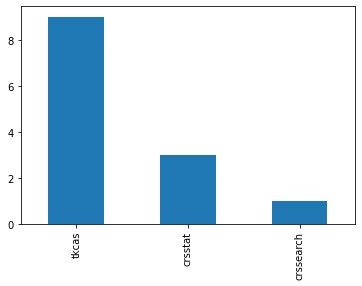

In [16]:
df['product_name'].value_counts().plot(kind="bar")

## <a id='4'> 4. Exploring the CAS File Structure</a>

### **Caslib Overview**:
1. A **caslib** has two parts:
    1. **Data Source** - Connection information about the **data source** gives access to a resource that contains data. These can be  files that are located in a file system, a database, streaming data from an ESP (Event Stream Processing) server, or other data sources that SAS can access.
    2. **In-Memory Space** - The **in-memory** portion of a caslib that contains data that is uploaded into memory and ready for processing.
    
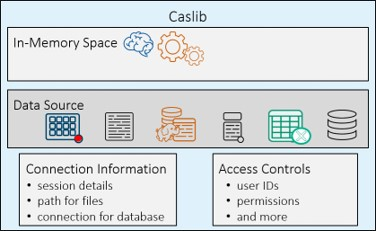
    

2. Think of your active **caslib** as the *current working directory* of your CAS session, and it's only possible to have one active caslib. 

3. When you want to work with data from your **data source**, you must load the data into the **in-memory portion** for processing. This loaded table is known as a **CAS Table**.

### **Types of Caslibs**:
1. **Personal Caslib** - By default, all users are given access to their own caslib, named CASUSER, within a CAS session.  This is a personal caslib and is only accessible to the user who owns the CAS session.
2. **Pre-defined Caslib** - These are defined by an administrator and are available to all CAS sessions (dependent on access controls). Think of these as different folders for different units of a business. You can have an HR caslib with HR data, Marketing caslib with Marketing data, etc.
3. **Manually added Caslib** - These can be added at any point to perform ad-hoc analysis within CAS.

### **Caslib Scope**
1. **Session Caslib** - When a caslib is defined without including the GLOBAL option, the caslib is a session-scoped caslib. When a table is loaded to the CAS server with session-scoped caslib, the table is available to that specific CAS user session only. Think of session scope as *local* to that specific session only.
2. **Global Caslib** -These are available to anyone who has access to the CAS Server (dependent on access controls). The name of these caslibs must be unique across all CAS sessions on the server.


**For additional information about caslibs**: 
- [Watch SAS® Viya™ CAS Libraries (Caslibs) Simplified](https://video.sas.com/detail/video/5343952274001/sas%C2%AE-viya%E2%84%A2-cas-libraries-caslibs-simplified)
- [SAS® Cloud Analytic Services 3.5: Fundamentals - Caslibs](https://go.documentation.sas.com/?docsetId=casfun&docsetTarget=n1i11h5hggxv65n1m5i4nw9s5cli.htm&docsetVersion=3.5&locale=en)

### a. View all Available Caslibs
- Depending on your CAS server setup, you might already have one or more caslibs configured and ready to use.
- If you do not have **ReadInfo** permissions on a caslib, then you will *not see* the caslib.

View all available caslibs using the **casLibInfo** action.

In [ ]:
conn.caslibInfo()

### b. View Available Files in the *casuser* Caslib

In [18]:
conn.fileInfo(caslib="casuser")

[FileInfo]

     Permission Owner Group                     Name      Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas            cars.sas7bdat    139264             2022-08-16T21:25:39+00:00  1.976304e+09
 1   -rwxr-xr-x   sas   sas              VTI.sashdat    413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 2   -rwxr-xr-x   sas   sas             hmeq.sashdat    630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 3   -rwxr-xr-x   sas   sas       tsa_claims_raw.csv  34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 4   -rwxr-xr-x   sas   sas  warranty_claims.parquet      4096       NONE  2022-11-17T13:43:26+00:00  1.984312e+09
 5   -rwxr-xr-x   sas   sas         HMEQ_SAS.parquet      4096       NONE  2022-11-17T13:46:56+00:00  1.984312e+09
 6   -rwxr-xr-x   sas   sas             cars.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 7   -rwxr-xr-x   sas   sas  WARRANTY_CLAIMS.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas        classCopy.sashdat     20904       NONE  2022-12-21T16:59:03+00:00  1.987261e+09
 9   -rwxr-xr-x   sas   sas             cars.sashdat    102936       NONE  2023-01-18T00:46:06+00:00  1.989622e+09
 10  -rwxr-xr-x   sas   sas                 cars.csv     34289             2023-01-06T14:29:25+00:00  1.988635e+09
 11  -rwxr-xr-x   sas   sas                 cars.txt     34289             2023-01-06T14:29:26+00:00  1.988635e+09
 12  -rwxr-xr-x   sas   sas           ordersDemo.csv    696446             2023-01-18T00:35:57+00:00  1.989621e+09

+ Elapsed: 0.0285s, user: 0.0115s, sys: 0.0167s, mem: 1.78mb

### c. View All Available In-Memory Tables in the *casuser* Caslib

NOTE: Tables need to be **in-memory** to be processed by CAS. 

In [19]:
conn.tableInfo(caslib="casuser")

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.011s, user: 0.00173s, sys: 0.0209s, mem: 1.43mb

## <a id='5'>5. Loading Data Into CAS
There are various ways of loading data into CAS: 
1. server-side data
2. client-side parsed 
3. client-side files uploaded and parsed on the server

They follow these naming conventions:

- **load***: Loads server-side data 
- **read_***: Uses client-side parsers and then uploads the result into CAS
- **upload***: Uploads client-side files as is, which are parsed on the server

For more information about loading client side files to CAS: [Two Simple Ways to Import Local Files with Python in CAS (Viya 3.5)](www.google.com)

### a. Loading Server-Side Data into Memory.

View the available files in the casuser caslib.

In [20]:
conn.fileInfo(caslib="casuser")

[FileInfo]

     Permission Owner Group                     Name      Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas            cars.sas7bdat    139264             2022-08-16T21:25:39+00:00  1.976304e+09
 1   -rwxr-xr-x   sas   sas              VTI.sashdat    413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 2   -rwxr-xr-x   sas   sas             hmeq.sashdat    630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 3   -rwxr-xr-x   sas   sas       tsa_claims_raw.csv  34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 4   -rwxr-xr-x   sas   sas  warranty_claims.parquet      4096       NONE  2022-11-17T13:43:26+00:00  1.984312e+09
 5   -rwxr-xr-x   sas   sas         HMEQ_SAS.parquet      4096       NONE  2022-11-17T13:46:56+00:00  1.984312e+09
 6   -rwxr-xr-x   sas   sas             cars.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 7   -rwxr-xr-x   sas   sas  WARRANTY_CLAIMS.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas        classCopy.sashdat     20904       NONE  2022-12-21T16:59:03+00:00  1.987261e+09
 9   -rwxr-xr-x   sas   sas             cars.sashdat    102936       NONE  2023-01-18T00:46:06+00:00  1.989622e+09
 10  -rwxr-xr-x   sas   sas                 cars.csv     34289             2023-01-06T14:29:25+00:00  1.988635e+09
 11  -rwxr-xr-x   sas   sas                 cars.txt     34289             2023-01-06T14:29:26+00:00  1.988635e+09
 12  -rwxr-xr-x   sas   sas           ordersDemo.csv    696446             2023-01-18T00:35:57+00:00  1.989621e+09

+ Elapsed: 0.0268s, user: 0.00658s, sys: 0.0207s, mem: 1.78mb

There are two methods that can be used to load server-side data into CAS:
- **loadtable** - Loads a table into CAS and returns a CASResults object.
- **load_path** - Convenience method. Similar to loadtable, load_path loads a table into CAS and returns a reference to that CAS table in one step.


**loadtable**

In [21]:
# 1. Load the table into CAS. Will return a CASResults object.
conn.loadtable(path="cars.sashdat", caslib="casuser", 
               casout={"caslib":"casuser",
                       "name":"cars", 
                       "replace":True})

NOTE: Cloud Analytic Services made the file cars.sashdat available as table CARS in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'CARS'

[casTable]

 CASTable('CARS', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0459s, user: 0.0192s, sys: 0.0689s, mem: 3.98mb

In [22]:
conn.tableInfo(caslib="casuser")

[TableInfo]

    Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart    SourceName                      SourceCaslib  Compressed                  Creator Modifier     SourceModTimeFormatted  SourceModTime
 0  CARS   428       15               0    utf-8  2023-01-18T00:46:50+00:00  2023-01-18T00:46:50+00:00  2023-01-18T00:46:50+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0  cars.sashdat  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com           2023-01-18T00:46:06+00:00   1.989622e+09

+ Elapsed: 0.011s, user: 0.0104s, sys: 0.0114s, mem: 1.82mb

In [23]:
# 2. Create a reference to the in-memory table
castbl = conn.CASTable("cars",caslib="casuser")

**load_path**

In [143]:
# Load the table into CAS and create a reference to that table in one step.
##castbl = conn.load_path(path="cars.sashdat", caslib="casuser",
##                        casout={"caslib":"casuser","name":"cars", "replace":True})

## b. Local vs CAS Data

A CASTable object is a reference to data **in the CAS server**. Actions or methods run on a CASTable object are processed in CAS.

In [24]:
type(castbl)

swat.cas.table.CASTable

In [25]:
print(castbl)

CASTable('cars', caslib='casuser')


View the first 5 rows of the in-memory table using the **head** method. The head method is not a CAS action, so it will not return a CASResults object. The head method is using the API to CAS. The API to CAS contains many of the pandas methods you are familiar with. These methods **process the data in CAS** and can return a variety of **different objects locally**.

[SWAT API Reference](https://sassoftware.github.io/python-swat/api.html)

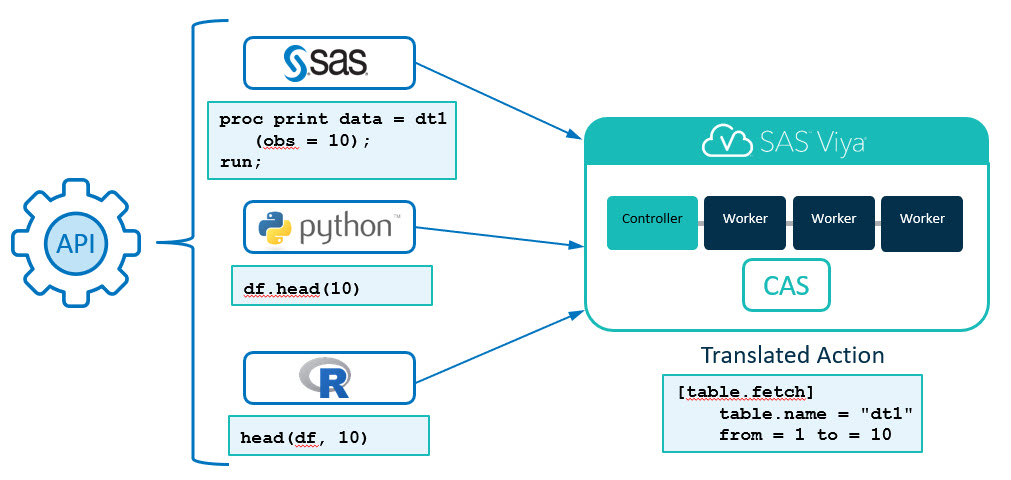

In [26]:
castbl.head()

Selected Rows from Table CARS

         Make            Model Type  Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
0  Land Rover  Range Rover HSE  SUV  Europe        All  72250.0  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0
1  Land Rover     Discovery SE  SUV  Europe        All  39250.0  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0
2  Land Rover    Freelander SE  SUV  Europe        All  25995.0  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0
3       Lexus           GX 470  SUV    Asia        All  45700.0  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0
4       Lexus           LX 470  SUV    Asia        All  64800.0  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0

The results of using the head method returns a SASDataFrame. SASDataFrames are located on locally.

In [27]:
type(castbl.head())

swat.dataframe.SASDataFrame

You can use the **fetch** CAS action to return similar results. The processing of the fetch CAS action occurs in CAS and returns a CASResults object to your local machine. When using a CAS action a CASResults object is always returned.

In [28]:
castbl.fetch(to=5)

[Fetch]

 Selected Rows from Table CARS
 
          Make            Model Type  Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
 0  Land Rover  Range Rover HSE  SUV  Europe        All  72250.0  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0
 1  Land Rover     Discovery SE  SUV  Europe        All  39250.0  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0
 2  Land Rover    Freelander SE  SUV  Europe        All  25995.0  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0
 3       Lexus           GX 470  SUV    Asia        All  45700.0  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0
 4       Lexus           LX 470  SUV    Asia        All  64800.0  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0

+ Elapsed: 0.0215s, user: 0.0235s, sys: 0.0253s, mem: 4.93mb

CASResults objects are local.

In [29]:
type(castbl.fetch(to=5))

swat.cas.results.CASResults

SASDataFrame objects can be contained in the CASResults object.

In [30]:
type(castbl.fetch(to=5)['Fetch'])

swat.dataframe.SASDataFrame

Turn on tracing.

In [31]:
swat.options.cas.trace_actions = True
swat.options.cas.trace_ui_actions = True

## <a id='6'>6. Exploring Table Details

### a. View the Number of Rows and Columns in the In-Memory Table.

Use **shape** to return a tuple of the CAS data. 

In [32]:
castbl.shape

[builtins.queryname]
    _apptag = 'UI'
    _messagelevel = 'error'
    name = 'simple.numrows'

[builtins.reflect]
    _apptag = 'UI'
    _messagelevel = 'error'
    actionset = 'simple'
    levels = 10
    showhidden = True

[simple.numrows]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[table.tableinfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    caslib = 'casuser'
    name = 'cars'



(428, 15)

Use the **numRows** CAS action to shows the number of rows in a CAS table.

In [33]:
castbl.numRows()

[simple.numrows]
    table.caslib = 'casuser'
    table.name = 'cars'



[numrows]

 428

+ Elapsed: 0.0149s, user: 0.0111s, sys: 0.02s, mem: 1.99mb

Use the **tableInfo** CAS action to show information about a CAS table.

In [34]:
castbl.tableInfo()

[table.tableinfo]
    caslib = 'casuser'
    name = 'cars'



[TableInfo]

    Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart    SourceName                      SourceCaslib  Compressed                  Creator Modifier     SourceModTimeFormatted  SourceModTime
 0  CARS   428       15               0    utf-8  2023-01-18T00:46:50+00:00  2023-01-18T00:46:50+00:00  2023-01-18T00:47:13+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0  cars.sashdat  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com           2023-01-18T00:46:06+00:00   1.989622e+09

+ Elapsed: 0.0101s, user: 0.00778s, sys: 0.0136s, mem: 1.83mb

Create a function to return the in-memory table name, number of rows and columns.

In [37]:
def details(tbl):
    sasdf = (tbl
             .tableInfo()["TableInfo"]
             .set_index("Name")
             .loc[:,["Rows","Columns"]]
            )
    return sasdf

In [38]:
details(castbl)

[table.tableinfo]
    caslib = 'casuser'
    name = 'cars'



Rows  Columns
Name               
CARS   428       15

### b. View the Column Information

In [39]:
castbl.columnInfo()

[table.columninfo]
    table.caslib = 'casuser'
    table.name = 'cars'



[ColumnInfo]

          Column Label  ID     Type  RawLength  FormattedLength Format  NFL  NFD
 0          Make         1  varchar         13               13           0    0
 1         Model         2  varchar         39               39           0    0
 2          Type         3  varchar          6                6           0    0
 3        Origin         4  varchar          6                6           0    0
 4    DriveTrain         5  varchar          5                5           0    0
 5          MSRP         6   double          8               12           0    0
 6       Invoice         7   double          8               12           0    0
 7    EngineSize         8   double          8               12           0    0
 8     Cylinders         9   double          8               12           0    0
 9    Horsepower        10   double          8               12           0    0
 10     MPG_City        11   double          8               12           0    0
 11  MPG_Highway        12   double          8               12           0    0
 12       Weight        13   double          8               12           0    0
 13    Wheelbase        14   double          8               12           0    0
 14       Length        15   double          8               12           0    0

+ Elapsed: 0.0171s, user: 0.00967s, sys: 0.025s, mem: 2.46mb

In [40]:
castbl.dtypes

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'



Make           varchar
Model          varchar
Type           varchar
Origin         varchar
DriveTrain     varchar
MSRP            double
Invoice         double
EngineSize      double
Cylinders       double
Horsepower      double
MPG_City        double
MPG_Highway     double
Weight          double
Wheelbase       double
Length          double
dtype: object

## <a id='7'>7. Data Exploration

### a. Summary Statistics

Using the **summary** CAS action to generate descriptive statistics of numeric variables.

In [41]:
castbl.summary()

[simple.summary]
    table.caslib = 'casuser'
    table.name = 'cars'



[Summary]

 Descriptive Statistics for CARS
 
         Column      Min       Max      N  NMiss          Mean         Sum           Std      StdErr           Var           USS           CSS         CV      TValue          ProbT  Skewness   Kurtosis
 0         MSRP  10280.0  192465.0  428.0    0.0  32774.855140  14027638.0  19431.716674  939.267478  3.775916e+08  6.209854e+11  1.612316e+11  59.288490   34.894059  4.160412e-127  2.798099  13.879206
 1      Invoice   9875.0  173560.0  428.0    0.0  30014.700935  12846292.0  17642.117750  852.763949  3.112443e+08  5.184789e+11  1.329013e+11  58.778256   35.196963  2.684398e-128  2.834740  13.946164
 2   EngineSize      1.3       8.3  428.0    0.0      3.196729      1368.2      1.108595    0.053586  1.228982e+00  4.898540e+03  5.247754e+02  34.679034   59.656105  3.133745e-209  0.708152   0.541944
 3    Cylinders      3.0      12.0  426.0    2.0      5.807512      2474.0      1.558443    0.075507  2.428743e+00  1.540000e+04  1.032216e+03  26.834946   76.913766  1.515569e-251  0.592785   0.440378
 4   Horsepower     73.0     500.0  428.0    0.0    215.885514     92399.0     71.836032    3.472326  5.160415e+03  2.215110e+07  2.203497e+06  33.275059   62.173176  4.185344e-216  0.930331   1.552159
 5     MPG_City     10.0      60.0  428.0    0.0     20.060748      8586.0      5.238218    0.253199  2.743892e+01  1.839580e+05  1.171642e+04  26.111777   79.229235  1.866284e-257  2.782072  15.791147
 6  MPG_Highway     12.0      66.0  428.0    0.0     26.843458     11489.0      5.741201    0.277511  3.296139e+01  3.224790e+05  1.407451e+04  21.387709   96.729204  1.665621e-292  1.252395   6.045611
 7       Weight   1850.0    7190.0  428.0    0.0   3577.953271   1531364.0    758.983215   36.686838  5.760555e+05  5.725125e+09  2.459757e+08  21.212776   97.526890  5.812547e-294  0.891824   1.688789
 8    Wheelbase     89.0     144.0  428.0    0.0    108.154206     46290.0      8.311813    0.401767  6.908624e+01  5.035958e+06  2.949982e+04   7.685150  269.196577   0.000000e+00  0.962287   2.133649
 9       Length    143.0     238.0  428.0    0.0    186.362150     79763.0     14.357991    0.694020  2.061519e+02  1.495283e+07  8.802687e+04   7.704349  268.525733   0.000000e+00  0.181977   0.614725

+ Elapsed: 0.0335s, user: 0.0594s, sys: 0.0748s, mem: 31.4mb

Using the **describe** method.

In [42]:
castbl.describe()

[simple.numrows]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[simple.topk]
    _apptag = 'UI'
    _messagelevel = 'error'
    bottomk = 0
    includemissing = False
    maxtie = 0
    order = 'freq'
    raw = True
    table.caslib = 'casuser'
    table.name = 'cars'
    topk = 1

[simple.topk]
    _apptag = 'UI'
    _messagelevel = 'error'
    bottomk = 1
    includemissing = False
    order = 'value'
    raw = True
    table.caslib = 'casuser'
    table.name = 'cars'
    topk = 1

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[builtins.queryactionset]
    _apptag = 'UI'
    _messagelevel = 'error'
    actionset = 'percen

MSRP        Invoice  EngineSize   Cylinders  Horsepower    MPG_City  MPG_Highway       Weight   Wheelbase      Length
count     428.000000     428.000000  428.000000  426.000000  428.000000  428.000000   428.000000   428.000000  428.000000  428.000000
mean    32774.855140   30014.700935    3.196729    5.807512  215.885514   20.060748    26.843458  3577.953271  108.154206  186.362150
std     19431.716674   17642.117750    1.108595    1.558443   71.836032    5.238218     5.741201   758.983215    8.311813   14.357991
min     10280.000000    9875.000000    1.300000    3.000000   73.000000   10.000000    12.000000  1850.000000   89.000000  143.000000
25%     20329.500000   18851.000000    2.350000    4.000000  165.000000   17.000000    24.000000  3103.000000  103.000000  178.000000
50%     27635.000000   25294.500000    3.000000    6.000000  210.000000   19.000000    26.000000  3474.500000  107.000000  187.000000
75%     39215.000000   35732.500000    3.900000    6.000000  255.000000   21.500000    29.000000  3978.500000  112.000000  194.000000
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   60.000000    66.000000  7190.000000  144.000000  238.000000

Turn off tracing.

In [43]:
swat.options.cas.trace_actions = False
swat.options.cas.trace_ui_actions = False 

### b. Distinct Values

Use the **distinct** CAS action to calculate the number of distinct values in the cars table.

In [44]:
castbl.distinct()

[Distinct]

 Distinct Counts for CARS
 
          Column  NDistinct  NMiss  Trunc
 0          Make       38.0    0.0    0.0
 1         Model      425.0    0.0    0.0
 2          Type        6.0    0.0    0.0
 3        Origin        3.0    0.0    0.0
 4    DriveTrain        3.0    0.0    0.0
 5          MSRP      410.0    0.0    0.0
 6       Invoice      425.0    0.0    0.0
 7    EngineSize       43.0    0.0    0.0
 8     Cylinders        8.0    2.0    0.0
 9    Horsepower      110.0    0.0    0.0
 10     MPG_City       28.0    0.0    0.0
 11  MPG_Highway       33.0    0.0    0.0
 12       Weight      348.0    0.0    0.0
 13    Wheelbase       40.0    0.0    0.0
 14       Length       67.0    0.0    0.0

+ Elapsed: 0.0414s, user: 0.04s, sys: 0.0935s, mem: 73.9mb

Plot the number of missing values for each column.

<AxesSubplot:xlabel='Column'>

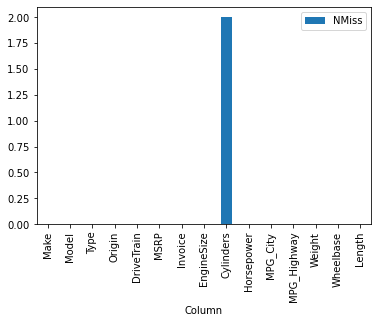

In [45]:
(castbl
 .distinct()['Distinct'] 
 .set_index("Column") 
 .loc[:,['NMiss']]
 .plot(kind='bar')
)

Use the **distinct** CAS action to calculate the number of distinct values in the Origin, Type and Make columns using the distinct CAS action.

In [46]:
castbl.distinct(inputs=["Origin","Type","Make"])

[Distinct]

 Distinct Counts for CARS
 
    Column  NDistinct  NMiss  Trunc
 0  Origin        3.0    0.0    0.0
 1    Type        6.0    0.0    0.0
 2    Make       38.0    0.0    0.0

+ Elapsed: 0.0412s, user: 0.0369s, sys: 0.0946s, mem: 71mb

Create a new CAS table named **castblDistinct** with the number of distinct values for the specified inputs.

In [47]:
castbl.distinct(inputs=["Origin","Type","Make"],
                casout={"caslib":"casuser",          ## Create a new CAS table in casuser
                        "name":"castblDistinct",     ## Name the table castblDistinct
                        "replace":True})             ## Replace if exists

[OutputCasTables]

                              casLib            Name  Rows  Columns                                                               casTable
 0  CASUSER(Peter.Styliadis@sas.com)  castblDistinct     3        4  CASTable('castblDistinct', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0566s, user: 0.0467s, sys: 0.122s, mem: 71.1mb

View the available in-memory tables.

In [48]:
conn.tableInfo()

[TableInfo]

              Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart    SourceName                      SourceCaslib  Compressed                  Creator Modifier     SourceModTimeFormatted  SourceModTime
 0            CARS   428       15               0    utf-8  2023-01-18T00:46:50+00:00  2023-01-18T00:46:50+00:00  2023-01-18T00:48:29+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0  cars.sashdat  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com           2023-01-18T00:46:06+00:00   1.989622e+09
 1  CASTBLDISTINCT     3        4               0    utf-8  2023-01-18T00:48:29+00:00  2023-01-18T00:48:29+00:00  2023-01-18T00:48:29+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0                                                           0  Peter.Styliadis@sas.com                                                NaN

+ Elapsed: 0.0111s, user: 0.0115s, sys: 0.0109s, mem: 1.89mb

Using Pandas methods.

In [49]:
castbl.Cylinders.nunique()

7

In [50]:
castbl.Cylinders.isnull().sum()

2.0

### c. Frequency

View the frequency of the Origin column using the **freq** CAS action.

In [51]:
castbl.freq(inputs=["Origin"])

[Frequency]

 Frequency for CARS
 
    Column CharVar  FmtVar  Level  Frequency
 0  Origin    Asia    Asia      1      158.0
 1  Origin  Europe  Europe      2      123.0
 2  Origin     USA     USA      3      147.0

+ Elapsed: 0.0404s, user: 0.0138s, sys: 0.115s, mem: 86.8mb

Plot the resuls of the **freq** CAS action in a bar chart.

<AxesSubplot:xlabel='CharVar'>

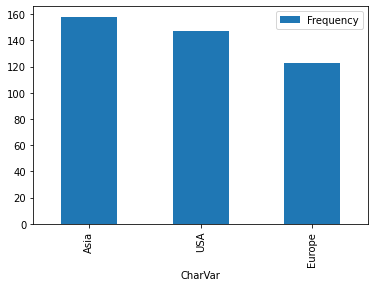

In [52]:
## Perform the processing in CAS and store the summary in the originFreq object.
originFreq = castbl.freq(inputs=["Origin"])['Frequency']

## Graph the summarized local data.
(originFreq
 .loc[:,["CharVar","Frequency"]] 
 .sort_values(by="Frequency", ascending=False)
 .set_index("CharVar") 
 .plot(kind="bar")
)

Use the **value_counts** method. The value_counts method will process in CAS and return the summary locally. The plot method will create the graph locally.

<AxesSubplot:>

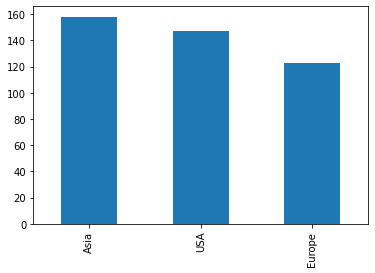

In [53]:
(castbl['Origin']
 .value_counts()
 .plot(kind='bar')
)

Perform a frequency on mulitple columns. The final CASResults object will contain a SASDataFrame with a frequency of each of the specified columns in one table.

In [54]:
castbl.freq(inputs=["Origin","Make","Type","DriveTrain"])

[Frequency]

 Frequency for CARS
 
         Column        CharVar         FmtVar  Level  Frequency
 0       Origin           Asia           Asia      1      158.0
 1       Origin         Europe         Europe      2      123.0
 2       Origin            USA            USA      3      147.0
 3         Make          Acura          Acura      1        7.0
 4         Make           Audi           Audi      2       19.0
 5         Make            BMW            BMW      3       20.0
 6         Make          Buick          Buick      4        9.0
 7         Make       Cadillac       Cadillac      5        8.0
 8         Make      Chevrolet      Chevrolet      6       27.0
 9         Make       Chrysler       Chrysler      7       15.0
 10        Make          Dodge          Dodge      8       13.0
 11        Make           Ford           Ford      9       23.0
 12        Make            GMC            GMC     10        8.0
 13        Make          Honda          Honda     11       17.0
 14        Make         Hummer         Hummer     12        1.0
 15        Make        Hyundai        Hyundai     13       12.0
 16        Make       Infiniti       Infiniti     14        8.0
 17        Make          Isuzu          Isuzu     15        2.0
 18        Make         Jaguar         Jaguar     16       12.0
 19        Make           Jeep           Jeep     17        3.0
 20        Make            Kia            Kia     18       11.0
 21        Make     Land Rover     Land Rover     19        3.0
 22        Make          Lexus          Lexus     20       11.0
 23        Make        Lincoln        Lincoln     21        9.0
 24        Make          Mazda          Mazda     22       11.0
 25        Make  Mercedes-Benz  Mercedes-Benz     23       26.0
 26        Make        Mercury        Mercury     24        9.0
 27        Make           MINI           MINI     25        2.0
 28        Make     Mitsubishi     Mitsubishi     26       13.0
 29        Make         Nissan         Nissan     27       17.0
 30        Make     Oldsmobile     Oldsmobile     28        3.0
 31        Make        Pontiac        Pontiac     29       11.0
 32        Make        Porsche        Porsche     30        7.0
 33        Make           Saab           Saab     31        7.0
 34        Make         Saturn         Saturn     32        8.0
 35        Make          Scion          Scion     33        2.0
 36        Make         Subaru         Subaru     34       11.0
 37        Make         Suzuki         Suzuki     35        8.0
 38        Make         Toyota         Toyota     36       28.0
 39        Make     Volkswagen     Volkswagen     37       15.0
 40        Make          Volvo          Volvo     38       12.0
 41        Type         Hybrid         Hybrid      1        3.0
 42        Type          Sedan          Sedan      2      262.0
 43        Type         Sports         Sports      3       49.0
 44        Type            SUV            SUV      4       60.0
 45        Type          Truck          Truck      5       24.0
 46        Type          Wagon          Wagon      6       30.0
 47  DriveTrain            All            All      1       92.0
 48  DriveTrain          Front          Front      2      226.0
 49  DriveTrain           Rear           Rear      3      110.0

+ Elapsed: 0.0588s, user: 0.0466s, sys: 0.0893s, mem: 87.8mb

### D. Create a Frequency Table of all Columns with Less Than 20 Distinct Values.

Use the distinct CAS action to find the number of distinct values for each column and filter for all columns with less than 20 distinct values.

In [55]:
distinctCars = castbl.distinct()['Distinct']
distinctCars.loc[distinctCars["NDistinct"]<=20,:]

Distinct Counts for CARS

       Column  NDistinct  NMiss  Trunc
2        Type        6.0    0.0    0.0
3      Origin        3.0    0.0    0.0
4  DriveTrain        3.0    0.0    0.0
8   Cylinders        8.0    2.0    0.0

Create a variable named **distinctCars** that holds the SASDataFrame from the results above.

In [57]:
distinctCars = distinctCars.loc[distinctCars["NDistinct"]<=20,:]
distinctCars

Distinct Counts for CARS

       Column  NDistinct  NMiss  Trunc
2        Type        6.0    0.0    0.0
3      Origin        3.0    0.0    0.0
4  DriveTrain        3.0    0.0    0.0
8   Cylinders        8.0    2.0    0.0

Create a list of column names that have less than 20 distinct values named **listCars**.

In [58]:
listCars = distinctCars.Column.unique().tolist()
print(listCars)

['Type', 'Origin', 'DriveTrain', 'Cylinders']


Use the list from above to create a frequency table of columns with less than 20 distinct values.

In [59]:
castbl.freq(inputs=listCars)

[Frequency]

 Frequency for CARS
 
         Column  NumVar CharVar        FmtVar  Level  Frequency
 0         Type     NaN  Hybrid        Hybrid      1        3.0
 1         Type     NaN   Sedan         Sedan      2      262.0
 2         Type     NaN  Sports        Sports      3       49.0
 3         Type     NaN     SUV           SUV      4       60.0
 4         Type     NaN   Truck         Truck      5       24.0
 5         Type     NaN   Wagon         Wagon      6       30.0
 6       Origin     NaN    Asia          Asia      1      158.0
 7       Origin     NaN  Europe        Europe      2      123.0
 8       Origin     NaN     USA           USA      3      147.0
 9   DriveTrain     NaN     All           All      1       92.0
 10  DriveTrain     NaN   Front         Front      2      226.0
 11  DriveTrain     NaN    Rear          Rear      3      110.0
 12   Cylinders     NaN                     .      1        2.0
 13   Cylinders     3.0                     3      2        1.0
 14   Cylinders     4.0                     4      3      136.0
 15   Cylinders     5.0                     5      4        7.0
 16   Cylinders     6.0                     6      5      190.0
 17   Cylinders     8.0                     8      6       87.0
 18   Cylinders    10.0                    10      7        2.0
 19   Cylinders    12.0                    12      8        3.0

+ Elapsed: 0.0374s, user: 0.0372s, sys: 0.0875s, mem: 87.6mb

## <a id='8'>8. Filtering Data

### a. Subset Using Pandas Indexing Expressions.

In [60]:
castbl[castbl["Make"]=="Toyota"].head()

Selected Rows from Table CARS

     Make                     Model    Type Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
0  Toyota  Prius 4dr (gas/electric)  Hybrid   Asia      Front  20510.0  18926.0         1.5        4.0       110.0      59.0         51.0  2890.0      106.0   175.0
1  Toyota               Sequoia SR5     SUV   Asia        All  35695.0  31827.0         4.7        8.0       240.0      14.0         17.0  5270.0      118.0   204.0
2  Toyota            4Runner SR5 V6     SUV   Asia      Front  27710.0  24801.0         4.0        6.0       245.0      18.0         21.0  4035.0      110.0   189.0
3  Toyota             Highlander V6     SUV   Asia        All  27930.0  24915.0         3.3        6.0       230.0      18.0         24.0  3935.0      107.0   185.0
4  Toyota              Land Cruiser     SUV   Asia        All  54765.0  47986.0         4.7        8.0       325.0      13.0         17.0  5390.0      112.0   193.0

In [61]:
castbl[(castbl["Make"]=="Toyota") & (castbl["Type"]=="Hybrid")].head()

Selected Rows from Table CARS

     Make                     Model    Type Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
0  Toyota  Prius 4dr (gas/electric)  Hybrid   Asia      Front  20510.0  18926.0         1.5        4.0       110.0      59.0         51.0  2890.0      106.0   175.0

### b. Subset Using the Query Method.

In [62]:
castbl.query("Make='Toyota'").head()

Selected Rows from Table CARS

     Make                     Model    Type Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
0  Toyota  Prius 4dr (gas/electric)  Hybrid   Asia      Front  20510.0  18926.0         1.5        4.0       110.0      59.0         51.0  2890.0      106.0   175.0
1  Toyota               Sequoia SR5     SUV   Asia        All  35695.0  31827.0         4.7        8.0       240.0      14.0         17.0  5270.0      118.0   204.0
2  Toyota            4Runner SR5 V6     SUV   Asia      Front  27710.0  24801.0         4.0        6.0       245.0      18.0         21.0  4035.0      110.0   189.0
3  Toyota             Highlander V6     SUV   Asia        All  27930.0  24915.0         3.3        6.0       230.0      18.0         24.0  3935.0      107.0   185.0
4  Toyota              Land Cruiser     SUV   Asia        All  54765.0  47986.0         4.7        8.0       325.0      13.0         17.0  5390.0      112.0   193.0

In [64]:
(castbl
 .query("Make='Toyota' and Type='Hybrid'")
 .head()
)

Selected Rows from Table CARS

     Make                     Model    Type Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
0  Toyota  Prius 4dr (gas/electric)  Hybrid   Asia      Front  20510.0  18926.0         1.5        4.0       110.0      59.0         51.0  2890.0      106.0   175.0

## <a id='9'>9. Data Preparation

Create a new column that calculates the average of MPG_City and MPG_Highway. Processing done in CAS.

In [65]:
castbl["avgMPG"] = (castbl["MPG_City"] + castbl["MPG_Highway"])/2

In [66]:
castbl

CASTable('cars', caslib='casuser', computedvars=['avgMPG'], computedvarsprogram='_add_5_ = (MPG_City) + (MPG_Highway); _div_6_ = (_add_5_) / (2); avgMPG = _div_6_; ')[['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']]

In [67]:
castbl.head()

Selected Rows from Table CARS

         Make            Model Type  Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  avgMPG
0  Land Rover  Range Rover HSE  SUV  Europe        All  72250.0  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0    14.0
1  Land Rover     Discovery SE  SUV  Europe        All  39250.0  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0    14.0
2  Land Rover    Freelander SE  SUV  Europe        All  25995.0  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0    19.5
3       Lexus           GX 470  SUV    Asia        All  45700.0  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0    17.0
4       Lexus           LX 470  SUV    Asia        All  64800.0  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0    15.0

Remove the Model and MSRP columns.

In [68]:
cols = ['Make', 'Type', 'Origin', 'DriveTrain','Invoice', 
        'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 
        'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']

In [69]:
castbl = castbl[cols]

In [70]:
castbl

CASTable('cars', caslib='casuser', computedvars=['avgMPG'], computedvarsprogram='_add_5_ = (MPG_City) + (MPG_Highway); _div_6_ = (_add_5_) / (2); avgMPG = _div_6_; ')[['Make', 'Type', 'Origin', 'DriveTrain', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']]

In [71]:
castbl.head()

Selected Rows from Table CARS

         Make Type  Origin DriveTrain  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  avgMPG
0  Land Rover  SUV  Europe        All  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0    14.0
1  Land Rover  SUV  Europe        All  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0    14.0
2  Land Rover  SUV  Europe        All  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0    19.5
3       Lexus  SUV    Asia        All  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0    17.0
4       Lexus  SUV    Asia        All  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0    15.0

## <a id='10'>10. SQL

### a. Load the fedSQL CAS Action Set

View all **available** (not just loaded) CAS action sets by using the all=True parameter.

In [72]:
conn.actionSetInfo(all=True)['setinfo']

Action set information

                    actionset               label  loaded            extension             version          product_name user_defined
0                      access                           0               tkacon  V.04.00M0P09192022                 tkcas        false
1               accessControl     Access Controls       1              casmeta  V.04.00M0P09192022                 tkcas        false
2                 activeLearn                           0               tkaluc  V.04.00M0P09192022          crsactivelrn        false
3                 aggregation                           0             tkcasagg  V.04.00M0P09192022          crsaggregate        false
4                      astore                           0               astore  V.04.00M0P09192022             crsastore        false
5                       audio                           0                audio  V.04.00M0P09192022              crsaudio        false
6                    autotune                           0             optminer  V.04.00M0P09192022           crsoptminer        false
7                        bart                           0                 bart  V.04.00M0P09192022               crsbart        false
8       bayesianNetClassifier                           0            tkcasbnet  V.04.00M0P09192022           crsbayesian        false
9                 bioMedImage                           0          biomedimage  V.04.00M0P09192022          crsbiomedimg        false
10                   boolRule                           0               casblr  V.04.00M0P09192022           crsboolrule        false
11                   builtins            Builtins       1            tkcasablt  V.04.00M0P09192022                 tkcas        false
12                cardinality                           0          cardinality  V.04.00M0P09192022           crscardinal        false
13                        cdm                           0                  cdm  V.04.00M0P09192022          crsaglossmod        false
14                 clustering                           0           tkcaskclus  V.04.00M0P09192022             crskmeans        false
15    conditionalRandomFields                           0                  crf  V.04.00M0P09192022                crscrf        false
16              configuration   Server Properties       1             tkcascfg  V.04.00M0P09192022                 tkcas        false
17                     copula                           0               copula  V.04.00M0P09192022             crscopula        false
18                   countreg                           0             countreg  V.04.00M0P09192022           crscountreg        false
19                  dataAgent                           0       tkcasdajobexec  V.04.00M0P09192022          crsdataagent        false
20              dataDiscovery                           0          dmdiscovery  V.04.00M0P09192022            crsprofile        false
21             dataPreprocess     Data Preprocess       1              tktrans  V.04.00M0P09192022               crsstat        false
22                dataQuality        Data Quality       0               casqkb  V.04.00M0P09192022            crsqkbmgmt        false
23           dataSciencePilot                           0            tkdspilot  V.04.00M0P09192022            crsdspilot        false
24                dataShaping                           0        tkdatashaping  V.04.00M0P09192022        crsdatashaping        false
25                   dataStep           DATA Step       1             datastep  V.04.00M0P09192022                 tkcas        false
26               decisionTree                           0              tkcasdt  V.04.00M0P09192022              crsdtree        false
27              deduplication                           0            casdedupe  V.04.00M0P09192022              crsdedup        false
28                   deepEcon                           0                  dlc  V.04.00M0P

Search the actionset column for any CAS action set that contains the string *sql*.

In [75]:
actionSets = conn.actionSetInfo(all=True)['setinfo']

actionSets.loc[actionSets['actionset'].str.upper().str.contains("SQL")]

Action set information

   actionset label  loaded  extension             version product_name user_defined
43    fedSql             0  casfedsql  V.04.00M0P09192022    crsfedsql        false

Load the **fedSQL** action set using the **loadActionSet** action.

In [76]:
conn.loadActionSet(actionSet="fedSQL")

NOTE: Added action set 'fedSQL'.


[actionset]

 'fedSQL'

+ Elapsed: 0.0194s, user: 0.00942s, sys: 0.0292s, mem: 1.21mb

In [77]:
conn.actionSetInfo()

[setinfo]

 Action set information
 
          actionset               label  loaded  extension             version product_name user_defined
 0    accessControl     Access Controls       1     tkacon  V.04.00M0P09192022        tkcas        false
 1    accessControl     Access Controls       1    casmeta  V.04.00M0P09192022        tkcas        false
 2         builtins            Builtins       1  tkcasablt  V.04.00M0P09192022        tkcas        false
 3    configuration   Server Properties       1   tkcascfg  V.04.00M0P09192022        tkcas        false
 4   dataPreprocess     Data Preprocess       1    tktrans  V.04.00M0P09192022      crsstat        false
 5         dataStep           DATA Step       1   datastep  V.04.00M0P09192022        tkcas        false
 6           fedSql              FedSQL       1  casfedsql  V.04.00M0P09192022    crsfedsql        false
 7       percentile          Percentile       1   tkcasptl  V.04.00M0P09192022      crsstat        false
 8           sccasl         CASL Server       1   tkcaslsc  V.04.00M0P09192022        tkcas        false
 9           search              Search       1     casidx  V.04.00M0P09192022    crssearch        false
 10         session     Session Methods       1   tkcsessn  V.04.00M0P09192022        tkcas        false
 11     sessionProp  Session Properties       1   tkcstate  V.04.00M0P09192022        tkcas        false
 12          simple    Simple Analytics       1   tkimstat  V.04.00M0P09192022      crsstat        false
 13           table               Table       1   tkcastab  V.04.00M0P09192022        tkcas        false

+ Elapsed: 0.0117s, user: 0.0131s, sys: 0.0119s, mem: 1.85mb

In [78]:
conn.help(actionSet="fedSQL")

NOTE: Information for action set 'fedSQL':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution


[fedSql]

          name                                                      description
 0  execDirect  Submits a SAS FedSQL language statement for immediate execution

+ Elapsed: 0.0084s, user: 0.00311s, sys: 0.0141s, mem: 1.13mb

### b. Run SQL Queries in CAS

Run a query to view the first 10 rows of the cars table.

In [79]:
conn.execdirect("""select *
                   from cars 
                   limit 10""")

[Result Set]

          Make              Model   Type  Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
 0  Land Rover    Range Rover HSE    SUV  Europe        All  72250.0  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0
 1  Land Rover       Discovery SE    SUV  Europe        All  39250.0  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0
 2  Land Rover      Freelander SE    SUV  Europe        All  25995.0  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0
 3       Lexus             GX 470    SUV    Asia        All  45700.0  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0
 4       Lexus             LX 470    SUV    Asia        All  64800.0  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0
 5       Lexus             RX 330    SUV    Asia        All  39195.0  34576.0         3.3        6.0       230.0      18.0         24.0  4065.0      107.0   186.0
 6       Lexus         ES 330 4dr  Sedan    Asia      Front  32350.0  28755.0         3.3        6.0       225.0      20.0         29.0  3460.0      107.0   191.0
 7       Lexus  IS 300 4dr manual  Sedan    Asia       Rear  31045.0  27404.0         3.0        6.0       215.0      18.0         25.0  3255.0      105.0   177.0
 8       Lexus    IS 300 4dr auto  Sedan    Asia       Rear  32415.0  28611.0         3.0        6.0       215.0      18.0         24.0  3285.0      105.0   177.0
 9       Lexus         GS 300 4dr  Sedan    Asia       Rear  41010.0  36196.0         3.0        6.0       220.0      18.0         25.0  3649.0      110.0   189.0

+ Elapsed: 0.0782s, user: 0.0814s, sys: 0.122s, mem: 21.7mb

Find the average MSRP of each car make.

In [80]:
conn.execdirect("""select Make, round(avg(MSRP)) as avgMSRP
                   from cars 
                   group by Make""")

[Result Set]

              Make  AVGMSRP
 0             Kia  15876.0
 1            Audi  43308.0
 2        Chrysler  27252.0
 3             BMW  43285.0
 4          Nissan  24731.0
 5         Porsche  83565.0
 6           Acura  42939.0
 7         Pontiac  24156.0
 8           Volvo  36314.0
 9           Mazda  21771.0
 10          Honda  21435.0
 11        Lincoln  42876.0
 12         Toyota  22524.0
 13       Infiniti  36070.0
 14           Ford  24016.0
 15         Hummer  49995.0
 16         Suzuki  16230.0
 17         Saturn  17234.0
 18          Lexus  44215.0
 19     Mitsubishi  23424.0
 20       Cadillac  50474.0
 21        Mercury  27973.0
 22  Mercedes-Benz  60657.0
 23          Dodge  26254.0
 24         Subaru  25502.0
 25      Chevrolet  26587.0
 26           MINI  18499.0
 27        Hyundai  17477.0
 28     Oldsmobile  23763.0
 29          Scion  13565.0
 30           Jeep  24518.0
 31     Volkswagen  32249.0
 32     Land Rover  45832.0
 33          Buick  30538.0
 34           Saab  37640.0
 35            GMC  29561.0
 36          Isuzu  26149.0
 37         Jaguar  61580.0

+ Elapsed: 0.175s, user: 0.964s, sys: 1.05s, mem: 782mb

Create a table named **make_avg** that contains the average MSRP of each car make.

In [81]:
conn.execdirect("""create table make_avg as
                      select Make, round(avg(MSRP)) as test
                      from cars 
                      group by Make""")

NOTE: Table MAKE_AVG was created in caslib CASUSER(Peter.Styliadis@sas.com) with 38 rows returned.


+ Elapsed: 0.24s, user: 1.1s, sys: 1.14s, mem: 896mb

In [82]:
conn.tableInfo(caslib="casuser")

[TableInfo]

              Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart    SourceName                      SourceCaslib  Compressed                  Creator Modifier     SourceModTimeFormatted  SourceModTime
 0            CARS   428       15               0    utf-8  2023-01-18T00:46:50+00:00  2023-01-18T00:46:50+00:00  2023-01-18T00:50:49+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0  cars.sashdat  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com           2023-01-18T00:46:06+00:00   1.989622e+09
 1  CASTBLDISTINCT     3        4               0    utf-8  2023-01-18T00:48:29+00:00  2023-01-18T00:48:29+00:00  2023-01-18T00:48:29+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0                                                           0  Peter.Styliadis@sas.com                                                NaN
 2        MAKE_AVG    38        2               0    utf-8  2023-01-18T00:50:49+00:00  2023-01-18T00:50:49+00:00  2023-01-18T00:50:49+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0                                                           0  Peter.Styliadis@sas.com                                                NaN

+ Elapsed: 0.0124s, user: 0.0111s, sys: 0.0128s, mem: 1.84mb

## <a id='11'>11. Analyzing Data

Preview the table.

In [83]:
castbl.head()

Selected Rows from Table CARS

         Make Type  Origin DriveTrain  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  avgMPG
0  Land Rover  SUV  Europe        All  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0    14.0
1  Land Rover  SUV  Europe        All  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0    14.0
2  Land Rover  SUV  Europe        All  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0    19.5
3       Lexus  SUV    Asia        All  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0    17.0
4       Lexus  SUV    Asia        All  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0    15.0

### a. Correlation with a Heat Map

Use the **correlation** action and remove the simple statistics. Processing will be done in CAS and the summary table will be returned locally.

In [84]:
castbl.correlation(inputs=["MSRP","EngineSize","HorsePower","MPG_City"], simple=False)

[Correlation]

 Pearson Correlation Coefficients for CARS
 
      Variable      MSRP  EngineSize  Horsepower  MPG_City
 0        MSRP  1.000000    0.571753    0.826945 -0.475020
 1  EngineSize  0.571753    1.000000    0.787435 -0.709471
 2  Horsepower  0.826945    0.787435    1.000000 -0.676699
 3    MPG_City -0.475020   -0.709471   -0.676699  1.000000

+ Elapsed: 0.0621s, user: 0.0966s, sys: 0.199s, mem: 55.5mb

Store the SASDataFrame object in the **dfCorr** variable. A SASDataFrame object is local.

In [85]:
dfCorr = castbl.correlation(inputs=["MSRP","EngineSize","HorsePower","MPG_City"], simple=False)['Correlation']
dfCorr

Pearson Correlation Coefficients for CARS

     Variable      MSRP  EngineSize  Horsepower  MPG_City
0        MSRP  1.000000    0.571753    0.826945 -0.475020
1  EngineSize  0.571753    1.000000    0.787435 -0.709471
2  Horsepower  0.826945    0.787435    1.000000 -0.676699
3    MPG_City -0.475020   -0.709471   -0.676699  1.000000

Replace the default index with the Variable column

In [86]:
dfCorr.set_index("Variable", inplace=True)
dfCorr

Pearson Correlation Coefficients for CARS

                MSRP  EngineSize  Horsepower  MPG_City
Variable                                              
MSRP        1.000000    0.571753    0.826945 -0.475020
EngineSize  0.571753    1.000000    0.787435 -0.709471
Horsepower  0.826945    0.787435    1.000000 -0.676699
MPG_City   -0.475020   -0.709471   -0.676699  1.000000

Use seaborn to produce a heatmap.

(4.0, -0.05)

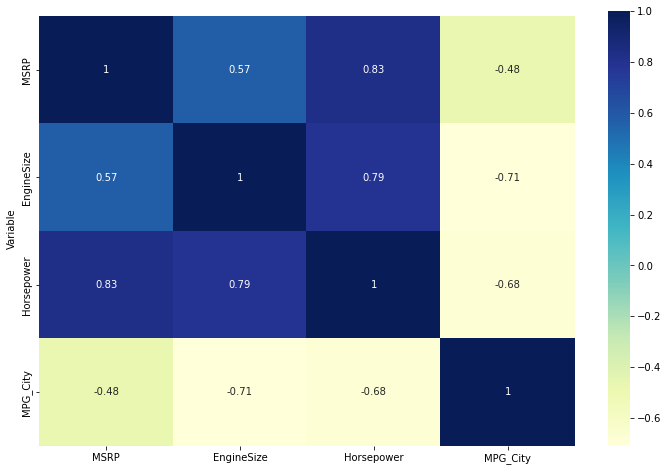

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(dfCorr, cmap="YlGnBu", annot=True)
ax.set_ylim(len(dfCorr),-.05)  ## Truncation with defaults. Need to adjust limits. Fixed in newer verison of matplotlib.

### b. Histogram

Run the **histogram** action to return a summary of the midpoints and percents. Processing occurs in CAS.

In [88]:
castbl.histogram(inputs=["avgMPG"])

[BinDetails]

 Bin Details for CARS
 
    Variable  BinSetId  BinId  BinLowerBnd  BinUpperBnd  BinWidth  NInBin       Mean       Std   Min   Max  MidPoint    Percent
 0    avgMPG         1      1         10.0    15.000000  5.000000       5  12.800000  1.440486  11.0  14.0      12.5   1.168224
 1    avgMPG         1      2         15.0    20.000000  5.000000      81  17.493827  1.441557  15.0  19.5      17.5  18.925234
 2    avgMPG         1      3         20.0    25.000000  5.000000     212  22.398585  1.345643  20.0  24.5      22.5  49.532710
 3    avgMPG         1      4         25.0    30.000000  5.000000      87  26.735632  1.515116  25.0  29.5      27.5  20.327103
 4    avgMPG         1      5         30.0    35.000000  5.000000      29  31.258621  1.106964  30.0  34.5      32.5   6.775701
 5    avgMPG         1      6         35.0    40.000000  5.000000       9  36.333333  1.581139  35.0  39.0      37.5   2.102804
 6    avgMPG         1      7         40.0    45.000000  5.000000       2  41.000000  1.414214  40.0  42.0      42.5   0.467290
 7    avgMPG         1      8         45.0    50.000000  5.000000       1  48.500000       NaN  48.5  48.5      47.5   0.233645
 8    avgMPG         1      9         50.0    55.000000  5.000000       0        NaN       NaN   NaN   NaN      52.5   0.000000
 9    avgMPG         1     10         55.0    60.000000  5.000000       1  55.000000       NaN  55.0  55.0      57.5   0.233645
 10   avgMPG         1     11         60.0    65.000001  5.000001       1  63.000000       NaN  63.0  63.0      62.5   0.233645

+ Elapsed: 0.0968s, user: 0.136s, sys: 0.248s, mem: 32.4mb

Store the BinDetails in the variable **mpgHist**.

In [89]:
mpgHist = castbl.histogram(inputs="avgMPG")['BinDetails']

Round the columns Percent and MidPoint.

In [90]:
mpgHist['Percent'] = mpgHist['Percent'].round(1)
mpgHist['MidPoint'] = mpgHist['MidPoint'].round(1)

In [91]:
mpgHist[["MidPoint","Percent"]].head()

Bin Details for CARS

   MidPoint  Percent
0      12.5      1.2
1      17.5     18.9
2      22.5     49.5
3      27.5     20.3
4      32.5      6.8

Plot the histogram.

Text(0.5, 1.0, 'Histogram of MPG')

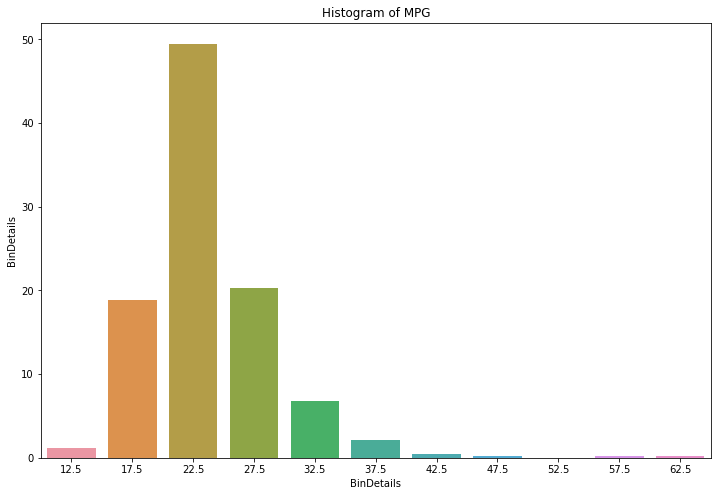

In [92]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x="MidPoint", y="Percent", data=mpgHist)
ax.set_title("Histogram of MPG")

Specify multiple columns in the **histogram** action.

In [93]:
castbl.histogram(inputs=["avgMPG", "HorsePower"])

[BinDetails]

 Bin Details for CARS
 
       Variable  BinSetId  BinId  BinLowerBnd  BinUpperBnd   BinWidth  NInBin        Mean        Std    Min    Max    MidPoint    Percent
 0       avgMPG         1      1         10.0    15.000000   5.000000       5   12.800000   1.440486   11.0   14.0   12.500000   1.168224
 1       avgMPG         1      2         15.0    20.000000   5.000000      81   17.493827   1.441557   15.0   19.5   17.500000  18.925234
 2       avgMPG         1      3         20.0    25.000000   5.000000     212   22.398585   1.345643   20.0   24.5   22.500000  49.532710
 3       avgMPG         1      4         25.0    30.000000   5.000000      87   26.735632   1.515116   25.0   29.5   27.500000  20.327103
 4       avgMPG         1      5         30.0    35.000000   5.000000      29   31.258621   1.106964   30.0   34.5   32.500000   6.775701
 5       avgMPG         1      6         35.0    40.000000   5.000000       9   36.333333   1.581139   35.0   39.0   37.500000   2.102804
 6       avgMPG         1      7         40.0    45.000000   5.000000       2   41.000000   1.414214   40.0   42.0   42.500000   0.467290
 7       avgMPG         1      8         45.0    50.000000   5.000000       1   48.500000        NaN   48.5   48.5   47.500000   0.233645
 8       avgMPG         1      9         50.0    55.000000   5.000000       0         NaN        NaN    NaN    NaN   52.500000   0.000000
 9       avgMPG         1     10         55.0    60.000000   5.000000       1   55.000000        NaN   55.0   55.0   57.500000   0.233645
 10      avgMPG         1     11         60.0    65.000001   5.000001       1   63.000000        NaN   63.0   63.0   62.500000   0.233645
 11  Horsepower         1      1         40.0    80.000000  40.000000       1   73.000000        NaN   73.0   73.0   60.000000   0.233645
 12  Horsepower         1      2         80.0   120.000000  40.000000      26  108.653846   6.560136   93.0  119.0  100.000000   6.074766
 13  Horsepower         1      3        120.0   160.000000  40.000000      65  139.953846  10.519967  120.0  157.0  140.000000  15.186916
 14  Horsepower         1      4        160.0   200.000000  40.000000      89  177.325843  11.639251  160.0  197.0  180.000000  20.794393
 15  Horsepower         1      5        200.0   240.000000  40.000000     115  216.739130  11.417966  200.0  239.0  220.000000  26.869159
 16  Horsepower         1      6        240.0   280.000000  40.000000      48  255.395833  13.411236  240.0  275.0  260.000000  11.214953
 17  Horsepower         1      7        280.0   320.000000  40.000000      50  296.960000   9.768671  280.0  316.0  300.000000  11.682243
 18  Horsepower         1      8        320.0   360.000000  40.000000      23  334.956522   9.942920  320.0  350.0  340.000000   5.373832
 19  Horsepower         1      9        360.0   400.000000  40.000000       4  390.000000   0.000000  390.0  390.0  380.000000   0.934579
 20  Horsepower         1     10        400.0   440.000000  40.000000       1  420.000000        NaN  420.0  420.0  420.000000   0.233645
 21  Horsepower         1     11        440.0   480.000000  40.000000       2  463.500000  19.091883  450.0  477.0  460.000000   0.467290
 22  Horsepower         1     12        480.0   520.000005  40.000005       4  494.750000   3.500000  493.0  500.0  500.000003   0.934579

+ Elapsed: 0.0987s, user: 0.0952s, sys: 0.289s, mem: 32.2mb

Store the results from the histogram CAS action in the **carsHist** variable.

In [94]:
carsHist = castbl.histogram(inputs=["avgMPG", "HorsePower"])['BinDetails']

Find the unique values in the carsHist SASDataFrame.

In [95]:
list(carsHist.Variable.unique())

['avgMPG', 'Horsepower']

Run a loop through the list of unique values and plot a histogram for each.

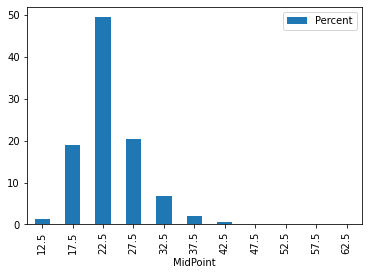

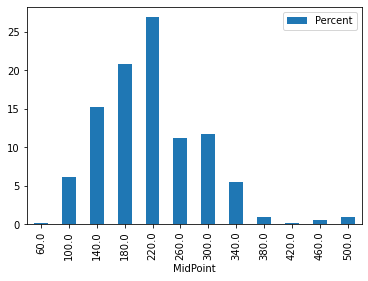

In [96]:
for i in list(carsHist.Variable.unique()):
    carsHist['Percent'] = carsHist['Percent'].round(1)
    carsHist['MidPoint'] = carsHist['MidPoint'].round(1)
    df = carsHist[carsHist["Variable"]==i]
    df.plot.bar(x='MidPoint', y='Percent')

## <a id='12'>12. Promote the Table to use in SAS Visual Analytics

In [97]:
castbl.head()

Selected Rows from Table CARS

         Make Type  Origin DriveTrain  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  avgMPG
0  Land Rover  SUV  Europe        All  65807.0         4.4        8.0       282.0      12.0         16.0  5379.0      113.0   195.0    14.0
1  Land Rover  SUV  Europe        All  35777.0         4.6        8.0       217.0      12.0         16.0  4576.0      100.0   185.0    14.0
2  Land Rover  SUV  Europe        All  23969.0         2.5        6.0       174.0      18.0         21.0  3577.0      101.0   175.0    19.5
3       Lexus  SUV    Asia        All  39838.0         4.7        8.0       235.0      15.0         19.0  4740.0      110.0   188.0    17.0
4       Lexus  SUV    Asia        All  56455.0         4.7        8.0       235.0      13.0         17.0  5590.0      112.0   193.0    15.0

In [98]:
castbl

CASTable('cars', caslib='casuser', computedvars=['avgMPG'], computedvarsprogram='_add_5_ = (MPG_City) + (MPG_Highway); _div_6_ = (_add_5_) / (2); avgMPG = _div_6_; ')[['Make', 'Type', 'Origin', 'DriveTrain', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']]

### Two Options:
- Save the castbl object as a physical file
- Create a new in-memory table from the castbl object.

### a. Save the castbl Object as a Physical File.

Use the **save** CAS action to save the castbl object as a physical file. Here we will save it as a sashdat file.

In [99]:
castbl.save(name="updatedCars.sashdat", caslib="casuser")

NOTE: Cloud Analytic Services saved the file updatedCars.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'updatedCars.sashdat'

+ Elapsed: 0.0711s, user: 0.108s, sys: 0.0736s, mem: 75.6mb

View the available files in the casuser caslib. Notice the updatedCars.sashdat file is available.

In [100]:
conn.fileInfo(caslib="casuser")

[FileInfo]

     Permission Owner Group                     Name      Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas            cars.sas7bdat    139264             2022-08-16T21:25:39+00:00  1.976304e+09
 1   -rwxr-xr-x   sas   sas              VTI.sashdat    413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 2   -rwxr-xr-x   sas   sas             hmeq.sashdat    630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 3   -rwxr-xr-x   sas   sas       tsa_claims_raw.csv  34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 4   -rwxr-xr-x   sas   sas  warranty_claims.parquet      4096       NONE  2022-11-17T13:43:26+00:00  1.984312e+09
 5   -rwxr-xr-x   sas   sas         HMEQ_SAS.parquet      4096       NONE  2022-11-17T13:46:56+00:00  1.984312e+09
 6   -rwxr-xr-x   sas   sas             cars.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 7   -rwxr-xr-x   sas   sas  WARRANTY_CLAIMS.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas        classCopy.sashdat     20904       NONE  2022-12-21T16:59:03+00:00  1.987261e+09
 9   -rwxr-xr-x   sas   sas             cars.sashdat    102936       NONE  2023-01-18T00:46:06+00:00  1.989622e+09
 10  -rwxr-xr-x   sas   sas                 cars.csv     34289             2023-01-06T14:29:25+00:00  1.988635e+09
 11  -rwxr-xr-x   sas   sas                 cars.txt     34289             2023-01-06T14:29:26+00:00  1.988635e+09
 12  -rwxr-xr-x   sas   sas           ordersDemo.csv    696446             2023-01-18T00:35:57+00:00  1.989621e+09
 13  -rwxr-xr-x   sas   sas      updatedCars.sashdat     87296       NONE  2023-01-18T00:51:19+00:00  1.989622e+09

+ Elapsed: 0.0294s, user: 0.00417s, sys: 0.0215s, mem: 1.82mb

### b. Create a New In-Memory Table From the castbl Object.

The partition CAS action has a variety of options, but if we leave the defaults we can take the castbl object (reference to the cars table with a few columns dropped and the new avgMPG column) and create a new in-memory table without saving a physical file.

Here a new in-memory table will be created called **cars_update** in the casuser caslib from the **castbl** object.

In [102]:
castbl.copyTable(casout={"caslib":"casuser",
                         "name":"cars_update",
                         "replace":True})

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'CARS_UPDATE'

[casTable]

 CASTable('CARS_UPDATE', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0583s, user: 0.103s, sys: 0.167s, mem: 599mb

View the new in-memory table **cars_update**.

In [103]:
conn.tableInfo(caslib="casuser")

[TableInfo]

              Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart    SourceName                      SourceCaslib  Compressed                  Creator Modifier     SourceModTimeFormatted  SourceModTime
 0            CARS   428       15               0    utf-8  2023-01-18T00:46:50+00:00  2023-01-18T00:46:50+00:00  2023-01-18T00:51:39+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0  cars.sashdat  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com           2023-01-18T00:46:06+00:00   1.989622e+09
 1  CASTBLDISTINCT     3        4               0    utf-8  2023-01-18T00:48:29+00:00  2023-01-18T00:48:29+00:00  2023-01-18T00:48:29+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0                                                           0  Peter.Styliadis@sas.com                                                NaN
 2        MAKE_AVG    38        2               0    utf-8  2023-01-18T00:50:49+00:00  2023-01-18T00:50:49+00:00  2023-01-18T00:50:49+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0                                                           0  Peter.Styliadis@sas.com                                                NaN
 3     CARS_UPDATE   428       16               0    utf-8  2023-01-18T00:51:39+00:00  2023-01-18T00:51:39+00:00  2023-01-18T00:51:39+00:00        UTF8  1.989622e+09  1.989622e+09  1.989622e+09       0         0     0          0                                                           0  Peter.Styliadis@sas.com                                                NaN

+ Elapsed: 0.0121s, user: 0.00852s, sys: 0.0156s, mem: 1.83mb

View the files in the casuser caslib. Notice no new files were created.

In [104]:
conn.fileInfo(caslib="casuser")

[FileInfo]

     Permission Owner Group                     Name      Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas            cars.sas7bdat    139264             2022-08-16T21:25:39+00:00  1.976304e+09
 1   -rwxr-xr-x   sas   sas              VTI.sashdat    413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 2   -rwxr-xr-x   sas   sas             hmeq.sashdat    630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 3   -rwxr-xr-x   sas   sas       tsa_claims_raw.csv  34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 4   -rwxr-xr-x   sas   sas  warranty_claims.parquet      4096       NONE  2022-11-17T13:43:26+00:00  1.984312e+09
 5   -rwxr-xr-x   sas   sas         HMEQ_SAS.parquet      4096       NONE  2022-11-17T13:46:56+00:00  1.984312e+09
 6   -rwxr-xr-x   sas   sas             cars.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 7   -rwxr-xr-x   sas   sas  WARRANTY_CLAIMS.parquet      4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas        classCopy.sashdat     20904       NONE  2022-12-21T16:59:03+00:00  1.987261e+09
 9   -rwxr-xr-x   sas   sas             cars.sashdat    102936       NONE  2023-01-18T00:46:06+00:00  1.989622e+09
 10  -rwxr-xr-x   sas   sas                 cars.csv     34289             2023-01-06T14:29:25+00:00  1.988635e+09
 11  -rwxr-xr-x   sas   sas                 cars.txt     34289             2023-01-06T14:29:26+00:00  1.988635e+09
 12  -rwxr-xr-x   sas   sas           ordersDemo.csv    696446             2023-01-18T00:35:57+00:00  1.989621e+09
 13  -rwxr-xr-x   sas   sas      updatedCars.sashdat     87296       NONE  2023-01-18T00:51:19+00:00  1.989622e+09

+ Elapsed: 0.03s, user: 0.00921s, sys: 0.0181s, mem: 1.79mb

### c. Promote a Table to Global Scope.

View all the tables in the casuser caslib. Focus on the specified columns. Notice no table is global scope.

In [105]:
conn.tableInfo(caslib="casuser")['TableInfo'][['Name','Rows','Columns','Global']]

Name  Rows  Columns  Global
0            CARS   428       15       0
1  CASTBLDISTINCT     3        4       0
2        MAKE_AVG    38        2       0
3     CARS_UPDATE   428       16       0

Use the **promote** CAS action to promote a table to global scope. Global scope allows other users and software like SAS Visual Analtyics to use the in-memory table. Currently, all the in-memory tables are session scope. That is, only this account on this connection to CAS can see the in-memory tables. 

In this example, the **cars_update** table is promoted to global scope in the casuser caslib. This only allows the current account (student) to access this table since it is promoted in the casuser caslib. If a table is promoted to global scope in a shared caslib, other users can see that table.

***DEMO: Go to SAS Visual Analyics and see cars_update does not exist outside of this session.***

Promote the **cars_update** in-memory table to global scope

In [106]:
conn.promote(name="cars_update", caslib="casuser")

NOTE: Cloud Analytic Services promoted table CARS_UPDATE in caslib CASUSER(Peter.Styliadis@sas.com) to table cars_update in caslib CASUSER(Peter.Styliadis@sas.com).


+ Elapsed: 0.0268s, user: 0.0134s, sys: 0.0222s, mem: 1.4mb

Notice only the **cars_update** table is global.

In [107]:
conn.tableInfo(caslib="casuser")['TableInfo'][['Name','Rows','Columns','Global']]

Name  Rows  Columns  Global
0            CARS   428       15       0
1  CASTBLDISTINCT     3        4       0
2        MAKE_AVG    38        2       0
3     CARS_UPDATE   428       16       1

***DEMO: Go to SAS Visual Analtyics and view the cars_update table outside of this session now that the in-memory table is global.***

## Terminate the CAS connection

In [108]:
conn.terminate()